<a href="https://colab.research.google.com/github/wei-ling-lin/machine-learning/blob/main/ml%20day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Forecast King County, Seattle Home Prices**

• 2014/05 ~ 2015/05

• 20 Features (X)

• 1 forecast price (Y)

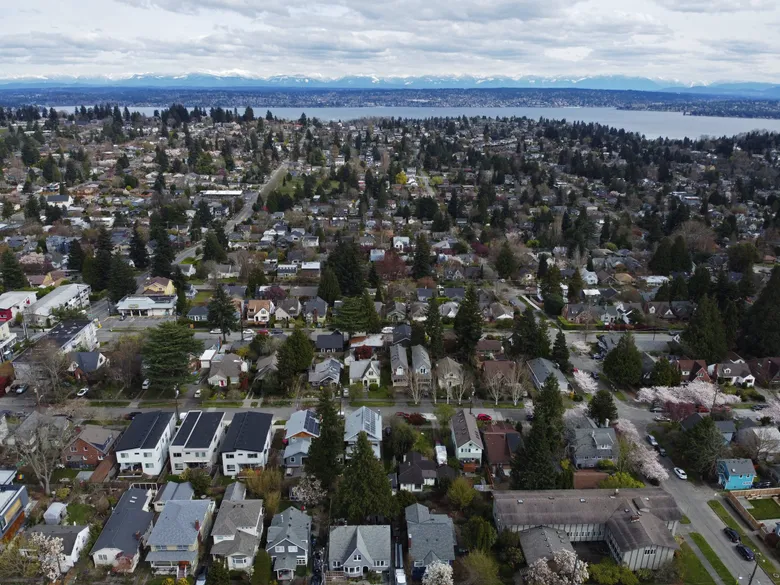

**Some variable explanation**
---
1. sqft_living : It is the measurement variable that determines the measurement of the house in square feet.

2. sqft_lot : It is also the measurement variable which determines square foot of the lot. 
3. floors: It determines total floors means levels of house. 

4. waterfront : This feature determines whether a house has a view to waterfront; 0 means no, 1 means yes. 

5. view : This feature determines whether a house has been viewed or not; 0 means no, 1 means yes. 

6. condition : It determines the overall condition of a house on a scale of 1 to 5. 

7. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11. 

8. sqft_above : It determines square footage of house apart from basement. 

9. sqft_basement : It determines square footage of the basement of the house. 

10. yr_built : It detrmines the date of building of the house. 

11. yr_renovated : It detrmines year of renovation of house. 

12. zipcode : It determines the zipcode of the location of the house. 

13. lat : It determines the latitude of the location of the house. 

14. long : It determines the longitude of the location of the house. 

15. sqft_living15 : Living room area in 2015(implies-- some renovations) 

16. sqft_lot15 : lotSize area in 2015(implies-- some renovations)

In [ ]:
#load library
import pandas 
from sklearn import *
import numpy as np
#read data file
df_train= pandas.read_csv('/content/df_train.csv')
df_train= df_train.drop(['date'],axis=1)
X = df_train.drop(['price'],axis = 1).values
Y = df_train['price'].values
print(X.shape)
df_train

(19999, 19)


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,301400850,260000.0,3,2.25,1489,2800,2.0,0,0,3,7,1489,0,2011,0,98002,47.3452,-122.215,1584,3200
19995,1123049232,279000.0,5,2.50,2690,5557,2.0,0,0,3,7,2690,0,2012,0,98178,47.4914,-122.253,2090,10500
19996,3654200037,380000.0,3,2.25,1530,1305,2.0,0,0,3,7,1116,414,2007,0,98177,47.7034,-122.357,1320,1427
19997,7299601790,287000.0,3,2.50,1600,6315,2.0,0,0,3,8,1600,0,2013,0,98092,47.2611,-122.198,1608,4300


In [ ]:
#get x(x_train) and y(y_train), get X(x_test)(may have Y(y_test))
x_train,x_test,y_train,y_test= model_selection.train_test_split(X,y,test_size=0.33,random_state=101)
s_scaler=preprocessing.StandardScaler()
x_train=s_scaler.fit_transform(x_train.astype(np.float))
x_test=s_scaler.transform(x_test.astype(np.float))
#print(x_train.shape, y_train.shape)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [ ]:
#Load the deep learning library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.optimizers import Adam
#Define the model
model = Sequential()
model.add(Dense(100,activation='relu'))
model.add(Dense(200,activation='relu'))
model.add(Dense(1))


In [ ]:
#Loss Functions and Optimization Algorithms
model.compile(optimizer='adam', loss='mse')
model.fit(x=x_train,y=y_train, batch_size=128, epochs=150)


Epoch 1/150
105/105 [==============================] - 1s 3ms/step - loss: 27352686592.0000
Epoch 2/150
105/105 [==============================] - 0s 3ms/step - loss: 27331620864.0000
Epoch 3/150
105/105 [==============================] - 0s 3ms/step - loss: 27303817216.0000
Epoch 4/150
105/105 [==============================] - 0s 3ms/step - loss: 27293302784.0000
Epoch 5/150
105/105 [==============================] - 0s 3ms/step - loss: 27282089984.0000
Epoch 6/150
105/105 [==============================] - 0s 3ms/step - loss: 27282802688.0000
Epoch 7/150
105/105 [==============================] - 0s 3ms/step - loss: 27280640000.0000
Epoch 8/150
105/105 [==============================] - 0s 3ms/step - loss: 27257520128.0000
Epoch 9/150
105/105 [==============================] - 0s 4ms/step - loss: 27242600448.0000
Epoch 10/150
105/105 [==============================] - 1s 6ms/step - loss: 27227183104.0000
Epoch 11/150
105/105 [==============================] - 1s 5ms/step - loss: 272

In [ ]:
#predict
myanswer= model.predict(x_test)
print('DL_MSE', metrics.mean_squared_error(y_test, myanswer))


DL_MSE 27269558128.15121
